# ナイーブベイズ分類
## ベイズ分類
ナイーブベイズ分類はベイズ分類の方法からなる。これらはベイズの定理に従っており、それは統計量の条件付確率の関係性を説明する式である。ベイズ分類では観測された特徴から与えられるラベルの確率を求めることに興味がある。それは$P(L|features)$として表現する。

ベイズの定理はより直接的に計算できる統計量から条件付確率をどのように表現するかを示す。

$$ P(L|features) = \frac{P(features|L)P(L)}{P(features)}$$

ここで、$P(L|features)$は特徴featuresが与えられた時にLが得られる確率、$P(features|L)$はラベルLの場合にfeaturesが得られる確率、$P(features)$はfeaturesが得られる確率を示す。

もし、2つのラベル間でどちらに当てはまるか試みるとして、それらのラベルを$L_1$、$L_2$とすると、それぞれのラベルの確率の比を計算すれば決定できる。

$$\frac{P(L_1|features)}{P(L_2|features)} = \frac{P(features|L_1)P(L_1)}{P(features|L_2)P(L_2)}$$

上式では$P(features)$が無くなり、$P(L_i)$は得られたサンプルから計算できる（例えば100サンプルの内、$L_1$が70サンプル、$L_2$が30サンプルならば$P(L_1) = 0.7$、$P(L_2) = 0.3$と自動的に求まる）。そのため、ここで必要となるのはそれぞれのラベルごとの$P(features|L_i)$を計算するためのモデルだけである。そのようなモデルは*generative model*（生成モデル）と呼ばれる。

ラベルごとにこの生成モデルを指定することはベイズ分類の学習の主要な部分である。汎用的なそのような学習ステップはとても難しいタスクであるが、このモデルの形状についてシンプルな仮定を使用するとシンプルに扱うことができる。

これがナイーブベイズのナイーブ（単純）の由縁である。

$P(features|L_i)$にどのような確率分布を取るかで、いくつかの種類がある。

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## ガウシアンナイーブベイズ
理解するのに最も簡単なナイーブベイズ分類はガウシアンナイーブベイズである。この分類器では、それぞれのラベルから得られたデータはシンプルなガウス分布から得られたと仮定するものである。つぎのようなデータを持っていると考える。

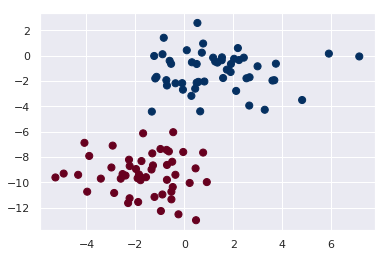

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

ガウシアンナイーブベイズはScikit-learnの`sklearn.naive_bayes.GaussianNB`で実装されている。

In [3]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

新しいデータを生成してラベルを予測してみる。

In [4]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

このラベルの境界がどこかをというアイデアを得るために新しいデータをプロットすることができる。

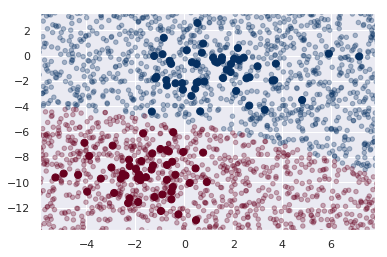

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.3)
plt.axis(lim);

分類によってわずかにカーブした境界が見える。一般的にガウシアンナイーブベイズの境界は2次となる。

`predict_proba`メソッドを利用して、ラベルごとの確率が計算できる。

In [6]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

もちろん、最終的な分類はそれを導くモデルの仮定ほどしか良くならないため、ガウシアンナイーブベイズは良い結果を生み出さない場合もある。それでも多くの場合、特に特徴が大きい場合、この仮定はガウシアンナイーブベイズが有用な方法であることを防ぐほど有害ではない。

## 多項ナイーブベイズ
特徴がシンプルな多項分布から生成されたと仮定をする。多項分布はいくつかのカテゴリーの中で観測したカウントの確率を説明するものである。そのため、多項ナイーブベイズはカウント数やカウント比を表す特徴にたいして最も適切である。

ガウスフィットによってデータ分布をモデリングする代わりに、多項分布フィットでデータ分布をモデル化することを除いて、アイデアは前と正確に同じである。

### 例：テキスト分類
多項ナイーブベイズがしばしば利用される場所の一つはテキスト分類であり、そこでは特徴が分類されるドキュメントの中の単語のカウントや頻度と関連している。ここでは短いドキュメントをどのカテゴリーにどのおうに分類するかを示す、20個のnewsgroupの集まりから疎な単語のカウント数の特徴を利用する。

データをダウンロードして、ターゲット名を見てみる。

In [7]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

単純化のため、ここではいくつかのカテゴリーのみを選択し、学習とテスト用のデータセットをダウンロードする。

In [8]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [9]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



このデータを機械学習に利用するために、内容の文字列毎に数字のベクトルに変換できなければならない。そのために、TF-IDFベクトライザーを使用して、それが多項ナイーブベイズ分類につながるパイプラインを作成する。

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [11]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

これまででテストデータに対するラベルを予測しているため、予測モデルのパフォーマンスを評価することが出来る。たとえば、これはテストデータに対する真のラベルと予測されたラベルの間の混同行列である。

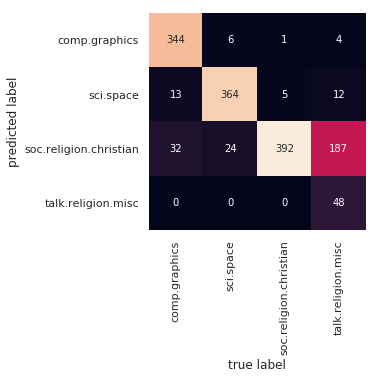

In [12]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

明らかに、この非常にシンプルな分類器であっても宇宙の話とコンピュータの話を分類に成功している。しかし、宗教とキリスト教の話の間では混同が見られる。しかしならがら、これは予期される混同の部分である。

ここでとてもクールな事柄は、パイプラインの`predict()`メソッドを使用して、どんな文字列に対してもカテゴリーを決定することが出来ることである。

In [13]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [14]:
predict_category('sending a payload to the ISS')

'sci.space'

In [15]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [16]:
predict_category('determining the screen resolution')

'comp.graphics'

## ナイーブベイズをいつ使うか
ナイーブベイズ分類器はデータに対して厳しい仮定を置くため、より複雑なモデルよりも一般的にパフォーマンスが出ない。そうはいっても、それらはいくつかの利点を持つ。

- 学習と予測がとても速い
- 直接的な確率の予測を与える
- とても理解しやすい
- 調整可能なパラメータが少ない

これらの利点はナイーブベイズ分類が初期の基準の分類としてよい選択であることを意味する。もしそれが適切に動作するのであれば、とても速くて理解しやすい分類器をその問題に利用できる。もし上手く動作しないならば、より洗練されたモデルで試す必要がある。

ナイーブベイズ分類は次のような状況で上手く動作することが多い。

- 単純な家庭がデータによく合う（実際はめったにない）
- とてもきれいに分かれたカテゴリー、モデルの複雑さが重要でない時
- とても高次元のデータ、モデルの複雑さが重要でない場合

最後の2つは区別されているようであるが、それらは実際関連している。データセットの次元が増えるに連れて、2点間はより離れる。これは高次元のクラスタはより離れがちであることを示す。

これらの理由から、次元数が増えるにつれてより複雑なモデルよりもうまく動作しがちである。いったん十分なデータが手に入れば、シンプルなモデルはとてもパワフルになることが出来る。